## Titanic challenge

>this is a very basic problem for entering ml and tabular ai world
>
>TODO: for more information read [challenge's page](https://www.kaggle.com/c/titanic/)  

## Importing Libraries

In [130]:
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from decision_tree import MultiNodeCategoricalDecisionTree
from sklearn.metrics import f1_score

## Loading the Dataset

TODO: Replace this section with code to load your actual dataset.

In this section, you should:
1. Load your dataset from a file (CSV, Excel, etc.) or a database
2. Display basic information about the dataset (shape, columns, etc.)
3. Show the first few rows of the data

In [131]:
# TODO: Load the actual dataset
def load_dataset():
    # This is a placeholder. Replace with actual data loading code.
#    data = pd.DataFrame({
#        'feature1': ['A', 'B', 'C', 'A', 'B'] * 20,
#        'feature2': ['X', 'Y', 'Z', 'X', 'Y'] * 20,
#        'feature3': ['P', 'Q', 'R', 'P', 'Q'] * 20,
#        'target': [0, 1, 0, 1, 0] * 20
#    })
    return pd.read_csv("train.csv"),pd.read_csv("test.csv"),pd.read_csv("gender_submission.csv")

df , X_test , Y_test = load_dataset()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


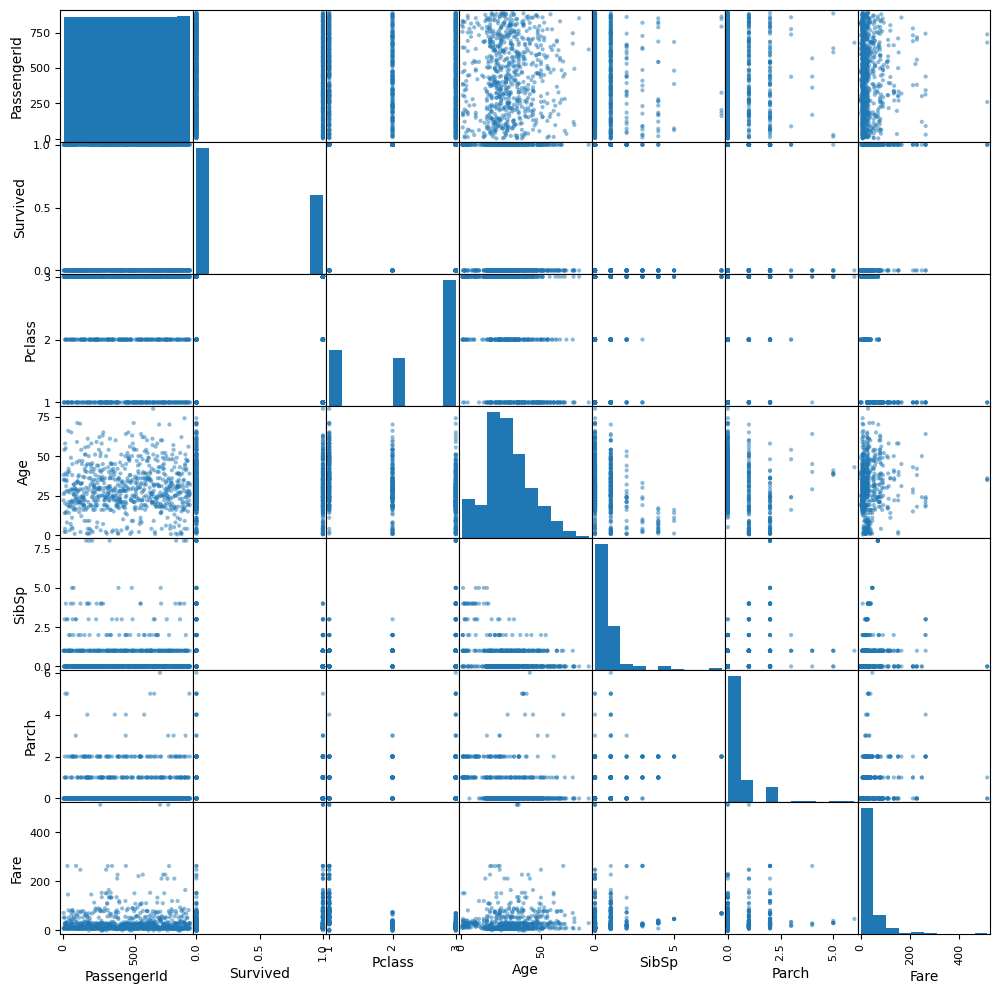

In [132]:
from pandas.plotting import scatter_matrix
#scatter_matrix
import matplotlib.pyplot as plt
matrix = scatter_matrix(df,figsize=(12,12))

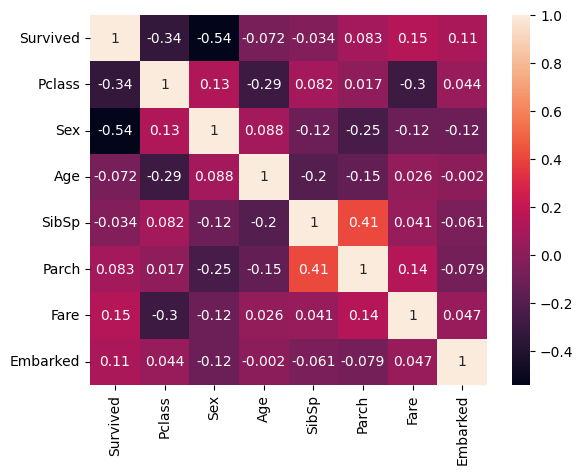

In [133]:
import seaborn as sns
ax = sns.heatmap(z.corr(), annot=True)
# data does not have correlation to eacht other

## Exploratory Data Analysis (EDA)

TODO: Perform exploratory data analysis on your dataset.

In this section, you should:
1. Analyze the distribution of features and target variable
2. Check for missing values and outliers
3. Visualize relationships between features and the target variable
4. Identify any patterns or correlations in the data

In [134]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [135]:
df.value_counts()

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

In [136]:
df.isnull().sum()
#we must drop Cabin because 90% is null

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Preprocessing

TODO: Preprocess your data to prepare it for the decision tree model.

In this section, you should:
1. Handle missing values (if any)
2. Encode categorical variables
3. Split the data into features (X) and target (y)
4. Split the data into training and testing sets

Note: You should encode your data before splitting it into features and target, 
because the decision tree classifier works with categorical data.

Example of encoding data:


In [137]:
"""
TODO: Add your preprocessing code here
Note : you should encode your data before split it into features and target ,
because decision tree classifier just work with categorical data
example of encoding data :
"""
#drop Cabin
df = df.drop(["Cabin","PassengerId","Name","Ticket"],axis=1)

#mapping / enconding features
map_01 = {
    "male":1,
    "female":0
}
map_02 = {
    "S":0,
    "C":1,
    "Q":2
}

df["Sex"] = df["Sex"].map(map_01)


#use binning algorithm
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Age"] = pd.cut(df["Age"], bins=4, labels=[0,1,2,3])
df["Fare"] = pd.cut(df["Fare"],bins=4, labels=[0,1,2,3])



#make x,y train
z = df.dropna()
z["Embarked"] = z["Embarked"].map(map_02)
z["Embarked"] = z["Embarked"].astype('int64')
X_train = z.drop('Survived', axis=1)
Y_train = z['Survived']



#le = LabelEncoder()

"""
Encode categorical features
Features need to be encoded using OrdinalEncoder search about this function in sklearn library

"""
# Split the data
#X_train, X_test, y_train, y_test =  # TODO : Split dataset using sklearn library ,naturally you should search about this function
#print("Training set shape:", X_train.shape)
#print("Test set shape:", X_test.shape)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6228\1055444761.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6228\1055444761.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z["Embark

'\nEncode categorical features\nFeatures need to be encoded using OrdinalEncoder search about this function in sklearn library\n\n'

## pre process for x,y test

In [138]:
#drop Cabin
dfT = pd.concat([X_test, Y_test],axis = 1)
dfT = dfT.drop(["Cabin","PassengerId","Name","Ticket"],axis=1)

#mapping / enconding features
map_01 = {
    "male":1,
    "female":0
}
map_02 = {
    "S":0,
    "C":1,
    "Q":2
}

dfT["Sex"] = dfT["Sex"].map(map_01)


#use binning algorithm
dfT["Age"].fillna(dfT["Age"].median(), inplace=True)
dfT["Age"] = pd.cut(dfT["Age"], bins=4, labels=[0,1,2,3])
dfT["Fare"] = pd.cut(dfT["Fare"],bins=4, labels=[0,1,2,3])

#make x,y train
zT = dfT.dropna()
zT["Embarked"] = zT["Embarked"].map(map_02)
zT["Embarked"] = zT["Embarked"].astype('int64')
X_test = zT.drop('Survived', axis=1)
Y_test = zT['Survived']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6228\495627256.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfT["Age"].fillna(dfT["Age"].median(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6228\495627256.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zT["Embar

## Training the Model

In [139]:
# Initialize and train the model
model = MultiNodeCategoricalDecisionTree(max_depth=5, min_samples_split=2).fit(X_train.values, Y_train.values)    #max_depth=5, min_samples_split=2
# TODO use cross-validation for training too

## Evaluating the Model

In [140]:
# Make predictions
y_pred = model.predict(X_test)

# Ensure y_pred is in the same format as y_test
y_pred = np.array(y_pred).astype(int)
y_test = np.array(Y_test).astype(int)

# Calculate accuracy and cross validation
accuracy = accuracy_score(y_pred, y_test) 

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Accuracy: {f1_score(y_pred, y_test):.4f}")

Accuracy: 0.8825
F1 Accuracy: 0.8256


In [141]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
scores = cross_val_score(
    model, X_train, Y_train, cv=5, scoring='f1_macro')
scores

array([0.71867816, 0.7899367 , 0.79116632, 0.78400441, 0.80592105])

## Feature Importances

In [142]:
# Display feature importances
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importances)

    feature  importance
0    Pclass    0.211365
1       Sex    0.211365
2       Age    0.176890
4     Parch    0.161436
3     SibSp    0.155254
6  Embarked    0.056110
5      Fare    0.027580


## check with sklearn learning Decision Tree

In [143]:
from sklearn import tree
#X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
predicted = clf.predict(X_test)
accuracy = accuracy_score(predicted, Y_test)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Accuracy: {f1_score(Y_test, predicted):.4f}")

Accuracy: 0.8465
F1 Accuracy: 0.7746


In [144]:
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score


path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Create an empty list to store the accuracy of models for each alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)

# Evaluate accuracy for each pruned model on the test set
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

# Find the best alpha that gives the highest test accuracy
best_index = test_scores.index(max(test_scores))
best_alpha = ccp_alphas[best_index]
best_clf = clfs[best_index]

# Evaluate the best model
predicted = best_clf.predict(X_test)
accuracy = accuracy_score(Y_test, predicted)

# Display the results
print(f"Best alpha: {best_alpha:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1_score(Y_test, predicted, average='weighted'):.4f}")


Best alpha: 0.0348
Accuracy: 1.0000
F1 Score: 1.0000


## Pro Plus 

In [145]:
# Boosting Baging
# در این روش مدل ها موازی و به صورت انتیتی ضعیف کنار هم درخت های تصمیم کوچک می سازند که جواب را به دست اورند
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

model = RandomForestClassifier().fit(X_train, Y_train)
preditt = model.predict(X_test)
f1 = f1_score(Y_test, preditt)
accuracy = accuracy_score(y_test, preditt)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Accuracy: {f1:.4f} ")

Accuracy: 0.8489
F1 Accuracy: 0.7835 


In [146]:
# Boosting AdaBoost
# در این روش مدل های پشت سرهم قرار می گیرند و ویک انتیتی ها درخت های تصمیمی می سازند که ورودی هر کدام خروجی دیگریست 
#روش کار اپدیت کردن وزن ها است و وزن هایی که درست پیش بینی کردن به همان صورت باقی ماند و اشتباهات با کمک تابع نمایی  سعی در بهتر کرن مدل می کند.
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=1).fit(X_train, Y_train)
predictions = model.predict(X_test)
f1 = f1_score(Y_test, predictions, average='weighted')
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Accuracy: {f1:.4f} ")

Accuracy: 1.0000
F1 Accuracy: 1.0000 


c:\Users\Lenovo\OneDrive\Desktop\Rayan\qenv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [147]:
# Boosting Gradient Boostin
#درخت تصمیم کامل پشت هم که هر دفعه ورودیش خروجی قبلیست که منهای تخمین  و لیلبل است.
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(max_depth=2, n_estimators=3).fit(X_train, Y_train)
predictions = model.predict(X_test)
f1 = f1_score(Y_test, predictions, average='weighted')
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Accuracy: {f1:.4f} ")

Accuracy: 0.8273
F1 Accuracy: 0.8109 
